In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# load dataset into Pandas DataFrame
df = pd.read_csv('consumer-price-indices_idn.csv',index_col = 'Iso3')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 763 entries, #country+code to IDN
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   StartDate    763 non-null    object 
 1   EndDate      763 non-null    object 
 2   Area Code    762 non-null    float64
 3   Area         763 non-null    object 
 4   Item Code    763 non-null    object 
 5   Item         763 non-null    object 
 6   Months Code  762 non-null    float64
 7   Months       762 non-null    object 
 8   Year Code    762 non-null    float64
 9   Year         763 non-null    object 
 10  Unit         247 non-null    object 
 11  Value        763 non-null    object 
 12  Flag         762 non-null    object 
 13  Note         516 non-null    object 
dtypes: float64(3), object(11)
memory usage: 89.4+ KB


In [3]:
df.head()

,StartDate,EndDate,Area Code,Area,Item Code,Item,Months Code,Months,Year Code,Year,Unit,Value,Flag,Note
Iso3,,,,,,,,,,,,,,
#country+code,#date+start,#date+end,NaN,#country+name,#indicator+code,#indicator+name,NaN,NaN,NaN,#date+year,#indicator+type,#indicator+value+num,NaN,NaN
IDN,2000-01-01,2000-01-31,101.0,Indonesia,23013,"Consumer Prices, Food Indices (2015 = 100)",7001.0,January,2000.0,2000,NaN,28.335622,X,base year is 2015
IDN,2001-01-01,2001-01-31,101.0,Indonesia,23013,"Consumer Prices, Food Indices (2015 = 100)",7001.0,January,2001.0,2001,NaN,28.574027,X,base year is 2015
IDN,2002-01-01,2002-01-31,101.0,Indonesia,23013,"Consumer Prices, Food Indices (2015 = 100)",7001.0,January,2002.0,2002,NaN,32.964682,X,base year is 2015
IDN,2003-01-01,2003-01-31,101.0,Indonesia,23013,"Consumer Prices, Food Indices (2015 = 100)",7001.0,January,2003.0,2003,NaN,34.449753,X,base year is 2015


In [4]:
df.drop(['#country+code'],axis=0, inplace=True)

In [5]:
df.isnull().sum()

StartDate        0
EndDate          0
Area Code        0
Area             0
Item Code        0
Item             0
Months Code      0
Months           0
Year Code        0
Year             0
Unit           516
Value            0
Flag             0
Note           246
dtype: int64

In [6]:
df.dropna().sum()

StartDate      0.0
EndDate        0.0
Area Code      0.0
Area           0.0
Item Code      0.0
Item           0.0
Months Code    0.0
Months         0.0
Year Code      0.0
Year           0.0
Unit           0.0
Value          0.0
Flag           0.0
Note           0.0
dtype: float64

In [7]:
df.drop(['StartDate', 'EndDate'], axis = 1, inplace=True)

In [8]:
X = df.drop(['Value'], axis=1)

y = df['Value']

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [10]:
df.columns

Index(['Area Code', 'Area', 'Item Code', 'Item', 'Months Code', 'Months',
       'Year Code', 'Year', 'Unit', 'Value', 'Flag', 'Note'],
      dtype='object')

In [13]:
from sklearn import preprocessing

categorical = ['Area Code', 'Area', 'Item Code', 'Item', 'Months Code', 'Months','Year Code', 'Year', 'Unit', 'Flag', 'Note']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])

<ipython-input-13-d15c26314d0d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[feature] = le.fit_transform(X_train[feature])
<ipython-input-13-d15c26314d0d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[feature] = le.transform(X_test[feature])


In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [15]:
X_train.head()

,Area Code,Area,Item Code,Item,Months Code,Months,Year Code,Year,Unit,Flag,Note
0,0.0,0.0,1.240981,1.240395,1.655567,-1.036758,0.758125,0.758125,-1.436391,-1.436391,1.436391
1,0.0,0.0,-1.213352,0.011528,1.059742,1.266909,0.596493,0.596493,0.696189,0.696189,-0.696189
2,0.0,0.0,1.240981,1.240395,-0.131909,0.115075,0.273228,0.273228,-1.436391,-1.436391,1.436391
3,0.0,0.0,0.013814,-1.217340,0.463916,-1.324717,-1.343094,-1.343094,0.696189,0.696189,-0.696189
4,0.0,0.0,-1.213352,0.011528,0.761829,1.554867,1.404654,1.404654,0.696189,0.696189,-0.696189


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy score with all the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy score with all the features: 0.0000


In [17]:
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
pca.explained_variance_ratio_

array([5.00022735e-01, 2.22633237e-01, 1.48617143e-01, 7.28152652e-02,
       5.59116202e-02, 5.80179684e-33, 1.93352308e-33, 2.80950651e-34,
       2.86484851e-35, 6.39970059e-66, 0.00000000e+00])

In [20]:
X = df.drop(['Value','Area Code'], axis=1)
y = df['Value']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


categorical = ['Area', 'Item Code', 'Item', 'Months Code', 'Months','Year Code', 'Year', 'Unit', 'Flag', 'Note']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])


X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy score with the first 13 features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

<ipython-input-20-4c21c356fb1c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[feature] = le.fit_transform(X_train[feature])
<ipython-input-20-4c21c356fb1c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[feature] = le.transform(X_test[feature])


Logistic Regression accuracy score with the first 13 features: 0.0000


In [21]:
X = df.drop(['Value'], axis=1)
y = df['Value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


categorical = ['Area Code', 'Area', 'Item Code', 'Item', 'Months Code', 'Months','Year Code', 'Year', 'Unit', 'Flag', 'Note']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])


X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)


pca= PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
dim = np.argmax(cumsum >= 0.90) + 1
print('The number of dimensions required to preserve 90% of variance is',dim)

The number of dimensions required to preserve 90% of variance is 4


<ipython-input-21-9d6f3230eb6d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[feature] = le.fit_transform(X_train[feature])
<ipython-input-21-9d6f3230eb6d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[feature] = le.transform(X_test[feature])


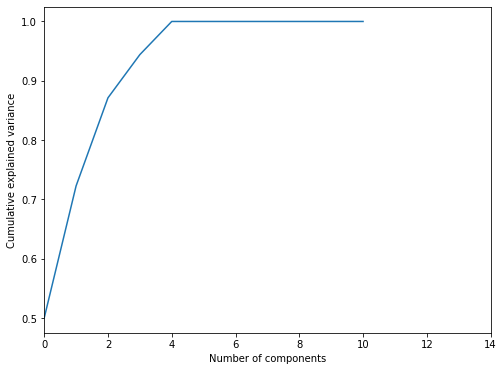

In [22]:
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,14,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [29]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)
X_r2 = lda.fit(X_train, y_train).transform(X_train)

In [30]:
X_r2

array([[-29.38541192],
       [-13.99043759],
       [ -5.88065447],
       [ 26.62334724],
       [-31.94345086],
       [  9.6617596 ],
       [ 13.70693698],
       [-21.55593702],
       [ 22.41615886],
       [ 38.13515519],
       [ 34.55169101],
       [ 37.97800128],
       [-16.24388288],
       [ -2.4543442 ],
       [  2.35228295],
       [ 36.82456465],
       [ 23.58902384],
       [-13.20470239],
       [ -2.4543442 ],
       [  9.68118795],
       [ 10.44263771],
       [-40.53437553],
       [ -9.42040487],
       [ 44.91491942],
       [-12.21813385],
       [-10.4069734 ],
       [ 29.88764651],
       [-10.54469897],
       [ 33.95225225],
       [  6.23544933],
       [-15.76274133],
       [  5.77373613],
       [-25.96395874],
       [-14.58987635],
       [ -1.06917024],
       [ 22.9410142 ],
       [ 21.8167201 ],
       [-17.51075963],
       [-14.45215079],
       [-18.65448208],
       [-17.87360397],
       [ -7.67238656],
       [-21.91878135],
       [ 37